In [121]:
import networkx as nx
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [127]:
flag = 'mod'
a_hats = sio.loadmat(f'/Users/stiso/Documents/Code/graph_learning/ECoG_data/behavior_preprocessed/a_hat_ex_{flag}.mat')
a_hats = a_hats['A_hats']

In [128]:
# A = np.array([[0, 1, 1, 1, 0, 0, 0, 0, 0, 1],
#     [1, 0, 1, 1, 1, 0, 0, 0, 0, 0],
#     [1, 1, 0, 1, 1, 0, 0, 0, 0, 0],
#     [1, 1, 1, 0, 1, 0, 0, 0, 0, 0],
#     [0, 1, 1, 1, 0, 1, 0, 0, 0, 0],
#     [0, 0, 0, 0, 1, 0, 1, 1, 1, 0],
#     [0, 0, 0, 0, 0, 1, 0, 1, 1, 1],
#     [0, 0, 0, 0, 0, 1, 1, 0, 1, 1],
#     [0, 0, 0, 0, 0, 1, 1, 1, 0, 1],
#     [1, 0, 0, 0, 0, 0, 1, 1, 1, 0]])*.25
# G = nx.convert_matrix.from_numpy_array(A)
# nx.info(G)

In [129]:
G[0]

AtlasView({1: {'weight': 0.20456430641545553}, 2: {'weight': 0.18938847614189655}, 3: {'weight': 0.039555571757879146}, 4: {'weight': 0.024379741484320157}, 5: {'weight': 0.011760243653330697}, 6: {'weight': 0.02437974148432015}, 7: {'weight': 0.039555571757879146}, 8: {'weight': 0.18938847614189655}, 9: {'weight': 0.20456430641545553}})

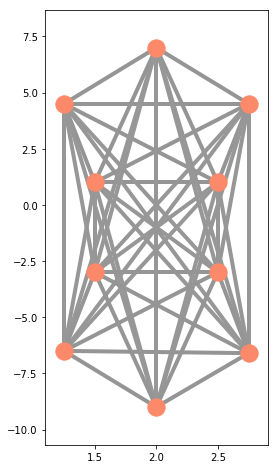

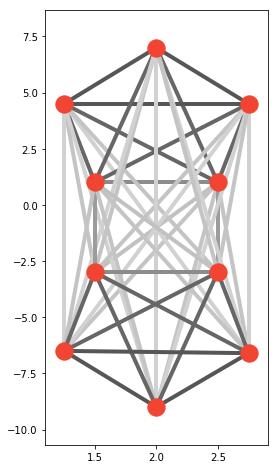

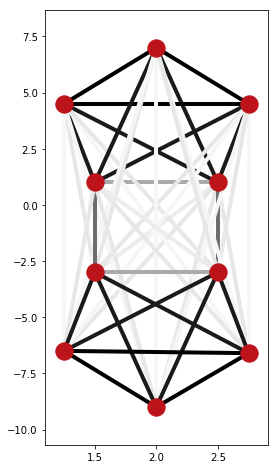

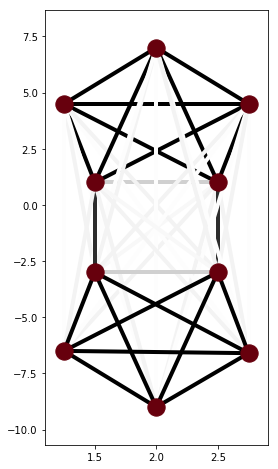

In [131]:
# set up plots

for graphid in (2,3,4,5):
    G = nx.convert_matrix.from_numpy_array(a_hats[:,:,graphid])
    
    if flag == 'mod':
        positions = {3: {'pos': (2,7)},
          1: {'pos': (1.25,4.5)},
          2: {'pos': (2.75,4.5)},
          4: {'pos': (1.5,1)},# trans
          0: {'pos': (2.5,1)}, #trans
          5: {'pos': (1.5,-3)}, #trans
          9: {'pos': (2.5,-3)}, #trans
          7: {'pos': (2.75,-6.6)},
          8: {'pos': (1.25,-6.5)},
          6: {'pos': (2,-9)}}
    else:
        positions = {0: {'pos': (3.1,-9.5)},
          1: {'pos': (-3.1,-9.5)},
          2: {'pos': (-8.1,-5.9)},
          3: {'pos': (-10.0,0)},# trans
          4: {'pos': (-8.1,5.9)}, #trans
          5: {'pos': (-3.1,9.5)}, #trans
          6: {'pos': (3.1,9.5)}, #trans
          7: {'pos': (8.1,5.9)},
          8: {'pos': (10.0,0)},
          9: {'pos': (8.1,-5.9)}}

    nx.set_node_attributes(G, positions)
    edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())

    node_map = plt.cm.get_cmap('Reds')
    options = {
        "node_color": node_map(graphid/5),
        "edge_color": weights,
        "width": 4,
        "edge_cmap": plt.cm.Greys,
        "with_labels": False,
        "edge_vmin": 0,
        "edge_vmax": .2,
    }
    if flag == 'mod':
        fig = plt.figure(figsize=(4,8))
        nx.networkx.drawing.nx_pylab.draw_networkx(G, pos=nx.get_node_attributes(G,'pos'), **options)
    else:
        fig = plt.figure(figsize=(4,4))
        nx.networkx.drawing.nx_pylab.draw_networkx(G, pos=nx.get_node_attributes(G,'pos'), **options)
    plt.savefig(f'/Users/stiso/Documents/Code/graph_learning/ECoG_data/behavior_preprocessed/images/a_hat_ex/{graphid}_{flag}.pdf')